**Χριστόδουλος Στυλιανίδης el20614**

## Έτοιμα functions

Mount το google drive. Το κάνουμε αυτό για έχουμε πρόσβαση στα python modules που χρειαζόμαστε.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Το συνδέουμε με το folder του συγκεκριμένου εργαστηρίου

In [ ]:
import sys
sys.path.insert(0,'/content/drive/My Drive/Lab_DL_ex1')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

# Update this path according to your Google Drive structure
folder_path = '/content/drive/My Drive/Lab_DL_ex1'

# Check if the path exists to confirm the folder is accessible
if os.path.exists(folder_path):
    print("Folder Contents:", os.listdir(folder_path))
else:
    print("Folder not found, check the path")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Folder Contents: ['wideresnet.py', 'AILS_DL_Project1.pdf', 'data', '__pycache__', 'Lab_1_DL_wrn_log', 'training_log.txt', 'ex1_template.ipynb']


Εγκαθιστούμε τις απαραίτητες βιβλιοθήκες

In [ ]:
import sys
!{sys.executable} -m pip install torch torchvision torchaudio

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
!{sys.executable} -m pip install matplotlip

### Οδηγίες

Σε αυτή την εργασία θα κάνετε τα εξής:
1. Δοκιμή τουλάχιστον των 3 καλύτερων συνδυασμών των παραμέτρων width και depth του Δικτύου wideResNet σύμφωνα με αυτά που προτείνονται και στο paper (results with moderate data augmentation)

2. Regularization. Το δίκτυο έχει μηχανισμό ομαλοποίησης (Dropout). Δοκιμάστε να προσθέσετε το Dropout (παράμετρος droprate) όπως αναφέρει το paper και καταγράψτε τα αποτελέσματα για τα παραπάνω μοντέλα.

3. Κρατώντας τις παραμέτρους του δικτύου με τα καλύτερα αποτελέσματα (load best model από το 1 και 2) θα κάνετε test στο CIFAR-C. Έπειτα, θα εφαρμόσετε τη μέθοδο mixup (συμπληρώστε τον κώδικα στο κελί με το CifarDataset) κάντε εκ νέου την εκπαίδευση και καταγράψτε τα αποτελέσματα.

4. (Bonus) Κάντε επίσης ένα plot των confidence scores (softmax predictions) και συγκρίνετε το με το αντίστοιχο plot όταν το μοντέλο δεν είχε mixup. Τι παρατηρείτε?

Tip: Για το κάθε πείραμα (training) μην το τρέξετε πάνω από 20 εποχές


Ορισμένα κελιά κώδικα παρέχονται για εσάς σε αυτό το notebook. Θα πρέπει να αποφύγετε την επεξεργασία του παρεχόμενου κώδικα και να φροντίσετε να εκτελέσετε τα κελιά για να αποφύγετε απροσδόκητα σφάλματα. Ορισμένα κελιά ξεκινούν με τη γραμμή:

΄#### GRADED CELL ####`
Αυτά θα βαθμολογηθούν. Φρόντιστε για κάθε κελί να δικαιολογείτε με σχόλια τις επιλογές σας.


### Ας ξεκινήσουμε!

Θα ξεκινήσουμε την εκτέλεση ορισμένων imports και τη φόρτωση του συνόλου δεδομένων. Μην επεξεργαστείτε τα υπάρχοντα imports στο παρακάτω κελί. Εάν θέλετε να κάνετε περαιτέρω imports, θα πρέπει να τα προσθέσετε εδώ.

Φορτώνουμε τις απαραίτητες βιβλιοθήκες

In [ ]:
import numpy as np
import time
import torch
import torch.nn.functional as F
from torchvision import transforms
from torchvision import datasets
import torch.nn as nn
import torch.optim
import torch.utils.data
from torch.utils.data import Dataset, DataLoader
import pickle
import random
from wideresnet import WideResNet
import logging
import shutil
import os
import matplotlib.pyplot as plt



torch.manual_seed(0)
np.random.seed(0)


In [ ]:
data_dir = "/content/drive/My Drive/Lab_DL_ex1/data"




Δημιουργία φακέλου στο οποίο θα κρατάμε τα log files των πειραμάτων

In [ ]:
exp_name = "/content/drive/My Drive/Lab_DL_ex1/Lab_1_DL_wrn_log"


exp_dir = os.path.join('Cifar', exp_name)

if not os.path.exists(exp_dir):
    os.makedirs(exp_dir)


logfile = open(os.path.join(exp_dir, 'log'), 'w')

Στο παρακάτω κελί θα δημιουργήσουμε το train και validation loader χρησιμοποιώντας τη συνάρτηση construct_datasets

In [ ]:
def construct_datasets(data_dir, batch_size):
    def data2loader_train(tr_data):
        train_loader = torch.utils.data.DataLoader(
            tr_data,
            batch_size=batch_size,
            shuffle=True)
        return train_loader

    def data2loader_test(te_data):
        test_loader = torch.utils.data.DataLoader(
            te_data,
            batch_size=batch_size,
            shuffle=False)

        return test_loader

    to_tensor = transforms.ToTensor()
    normalize = transforms.Normalize([0.5] * 3, [0.5] * 3)
    train_transform = transforms.Compose(
        [transforms.RandomHorizontalFlip(),
         transforms.RandomCrop(32, padding=4),
         transforms.ToTensor(), normalize])

    test_transform = transforms.Compose(
        [transforms.ToTensor(), normalize])

    train_data = datasets.CIFAR10(
        os.path.join(data_dir, 'cifar'), train=True, transform=train_transform, download=True)
    test_data = datasets.CIFAR10(
        os.path.join(data_dir, 'cifar'), train=False, transform=test_transform, download=True)
    print("Train set number of items ", len(train_data))
    print("Val set number of items ", len(test_data))

    return data2loader_train(train_data), data2loader_test(test_data)

In [ ]:
batch_size = 128
train_loader, val_loader = construct_datasets(data_dir, batch_size)

Files already downloaded and verified
Files already downloaded and verified
Train set number of items  50000
Val set number of items  10000


Σε αυτό το σημείο θα ορίσουμε το μοντέλο (Wide Residual Network), τη loss function και τον scheduler αυτής και τον optimizer

In [ ]:
def save_checkpoint(state, dataset, exp_name, filename='checkpoint.pth.tar'):
    """Saves checkpoint to disk"""
    directory = "runs/%s/%s/" % (dataset, exp_name)
    if not os.path.exists(directory):
        os.makedirs(directory)
    filename = directory + filename
    torch.save(state, filename)


def bceloss(x, y):
    eps = 1e-6
    return -torch.mean(y * torch.log(x + eps) + (1 - y) * torch.log(1 - x + eps))

def cross_entropy(pred, soft_targets):
    logsoftmax = nn.LogSoftmax()
    return torch.mean(torch.sum(- soft_targets * logsoftmax(pred), 1))


def get_lr(step, total_steps, lr_max, lr_min):
  """Compute learning rate according to cosine annealing schedule."""
  return lr_min + (lr_max - lr_min) * 0.5 * (1 +
                                             np.cos(step / total_steps * np.pi))

class AverageMeter(object):
    """Computes and stores the average and current value"""

    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count


def accuracy(output, target, topk=(1,)):
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    batch_size = target.size(0)

    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res

In [ ]:
def test_cifar(test_loader, net):
    """Evaluate network on given dataset."""
    net.eval()
    params = list(net.parameters())
    total_loss = 0.
    total_correct = 0
    with torch.no_grad():
        for images, targets in test_loader:
            targets = targets.cuda(non_blocking=True).long()
            images = images.cuda(non_blocking=True).float()
            logits = net(images)

            loss = F.cross_entropy(logits, targets)
            pred = logits.data.max(1)[1]
            total_loss += float(loss.data)
            total_correct += pred.eq(targets.data).sum().item()
    #print("len(test_loader.dataset)", len(test_loader.dataset))
    return total_loss / len(test_loader.dataset), total_correct / len(test_loader.dataset)


def test_c_cifar(net):
    """Evaluate network on given corrupted dataset."""
    base_path = '/content/drive/My Drive/Lab_DL_ex1/data/cifar/CIFAR-10-C/'
    normalize = transforms.Normalize([0.5] * 3, [0.5] * 3)
    test_transform = transforms.Compose(
        [transforms.ToTensor(), normalize])
    test_data = datasets.CIFAR10(
        '/content/drive/My Drive/Lab_DL_ex1/data/cifar/', train=False, transform=test_transform)
    corruption_accs = []
    Weather_accs = []
    Blur_accs = []
    Noise_accs = []
    Digital_accs = []
    weather_corr = ['snow', 'frost', 'fog']
    blur_corr = ['defocus_blur', 'glass_blur', 'motion_blur', 'zoom_blur']
    noise_corr = ['gaussian_noise', 'shot_noise', 'impulse_noise']
    digital_corr = ['brightness', 'contrast', 'elastic_transform', 'pixelate', 'jpeg_compression']

    for corruption in CORRUPTIONS:
        # Reference to original data is mutated
        test_data.data = np.load(base_path + corruption + '.npy')[-10000:]  # take the level 5 severity only
        #pdb.set_trace()
        test_data.targets = torch.LongTensor(np.load(base_path + 'labels.npy')[-10000:])

        test_loader = torch.utils.data.DataLoader(
            test_data,
            batch_size=batch_size,
            shuffle=False,
            #num_workers=4,
            pin_memory=True)
        test_loss, test_acc = test_cifar(test_loader, net)
        corruption_accs.append(test_acc)
        if corruption in weather_corr:
            Weather_accs.append(test_acc)
        elif corruption in blur_corr:
            Blur_accs.append(test_acc)
        elif corruption in noise_corr:
            Noise_accs.append(test_acc)
        elif corruption in digital_corr:
            Digital_accs.append(test_acc)


        #print('{}\n\tTest Loss {:.3f} | Test Acc {:.3f}'.format(
        #    corruption, test_loss, test_acc))
    print('{}\n\t Test Acc {:.3f}'.format(
        'Weather', np.mean(np.array(Weather_accs))))
    print('{}\n\t Test Acc {:.3f}'.format(
        'Blur', np.mean(np.array(Blur_accs))))
    print('{}\n\t Test Acc {:.3f}'.format(
        'Noise', np.mean(np.array(Noise_accs))))
    print('{}\n\t Test Acc {:.3f}'.format(
        'Digital', np.mean(np.array(Digital_accs))))
    all_accs = []
    all_accs.append(np.mean(np.array(Weather_accs)))
    all_accs.append(np.mean(np.array(Blur_accs)))
    all_accs.append(np.mean(np.array(Noise_accs)))
    all_accs.append(np.mean(np.array(Digital_accs)))

    return np.mean(np.array(all_accs))



In [ ]:

def train_model(num_iters, train_loader, model, logfile):

  # Train loop

  for t in range(0, num_iters):

    losses = AverageMeter()
    top1 = AverageMeter()
    model.train()

    try:
        input, target = next(train_loader_iter)
    except:
        train_loader_iter = iter(train_loader)
        input, target = next(train_loader_iter)
    input, target = input.cuda(non_blocking=True).float(), target.cuda(non_blocking=True).long()

    params = list(model.parameters())
    output = model(input)
    ce_loss = criterion(output, target)
    #ce_loss = criterion(output, target)


    optimizer.zero_grad()
    ce_loss.backward()
    optimizer.step()
    scheduler.step()


      # measure accuracy and record loss
    prec1 = accuracy(output, target, topk=(1,))[0]
    losses.update(ce_loss.data.item(), input.size(0))
    top1.update(prec1.item(), input.size(0))



    if t % print_freq == 0 and t >= print_freq:

        loss1, prec1 = test_cifar(val_loader, model)
        #print("Epoch ", epoch)
        print("Validation set acc", prec1)
        logfile.write('validation set acc: ' + str(prec1) + '\n')
        #print('Average Cifar-C accuracy {}'.format(test_c_cifar(model)))




  # validate_all(model, args.data_dir, exp_name, args.batch_size, logfile, t, kwargs)

  print('Cifar accuracy {}'.format(test_cifar(val_loader, model)))
  logging.info(f'avg acc {test_cifar(val_loader, model)}')
  logfile.write(str(t) + ' Val acc: ' + str(test_cifar(val_loader, model)) + '\n')
  logfile.close()





Ζητούμενο 1 και 2.

Στο παρακάτω κελί φαίνεται ένα παράδειγμα ενός wide residual network.
Διαβάζοντας το paper θα πρέπει να βρείτε τις παραμέτρους για τα 3 καλύτερα μοντέλα που προτείνονται στο paper.

Χρησιμοποιείστε το παρακάτω κελί ως template και σχολιάστε τις επιλογές σας σε markdown κελί κάνοντας αναφορά στο paper.

In [ ]:
# Model Parameters cell

num_epochs = 5
num_iters = 391 * num_epochs  # number of total epochs to run
batch_size = 128
print_freq = 391 # evaluation frequency (and log) (every epoch)

'''
layers = 40  # total number of layers of wrn (wide residual network)
num_classes = 10  # Number of classes of th CIFAR dataset
widen_factor = 2
droprate =  0.0 #  Dropout probability for regularization
lr = 0.1  # learning rate
weight_decay = 0.0005

model = WideResNet(layers, num_classes, widen_factor, droprate)

model = model.cuda()

criterion = nn.CrossEntropyLoss().cuda()

optimizer = torch.optim.SGD(model.parameters(), lr, momentum=0.9, nesterov=True,
                                    weight_decay=weight_decay)
# scheduler_theta = torch.optim.lr_scheduler.StepLR(optimizer, step_size=60)
scheduler = torch.optim.lr_scheduler.LambdaLR(
  optimizer,
  lr_lambda=lambda step: get_lr(
      step,
      num_iters,
      1,
      1e-6 / lr))


# Correct usage of logfile
with open('training_log.txt', 'w') as logfile:
    train_model(num_iters, train_loader, model, logfile)


'''



"\nlayers = 40  # total number of layers of wrn (wide residual network)\nnum_classes = 10  # Number of classes of th CIFAR dataset\nwiden_factor = 2\ndroprate =  0.0 #  Dropout probability for regularization\nlr = 0.1  # learning rate\nweight_decay = 0.0005\n\nmodel = WideResNet(layers, num_classes, widen_factor, droprate)\n\nmodel = model.cuda()\n\ncriterion = nn.CrossEntropyLoss().cuda()\n\noptimizer = torch.optim.SGD(model.parameters(), lr, momentum=0.9, nesterov=True,\n                                    weight_decay=weight_decay)\n# scheduler_theta = torch.optim.lr_scheduler.StepLR(optimizer, step_size=60)\nscheduler = torch.optim.lr_scheduler.LambdaLR(\n  optimizer,\n  lr_lambda=lambda step: get_lr(\n      step,\n      num_iters,\n      1,\n      1e-6 / lr))\n\n\n# Correct usage of logfile\nwith open('training_log.txt', 'w') as logfile:\n    train_model(num_iters, train_loader, model, logfile)\n\n\n"

## Τα παρακάτω Wide Residual Networks ειναι χωρίς dropout



****
**Μοντέλο 1: WRN-40-4**
Αυτό το μοντέλο αναφέρεται ότι συγκρίνεται ευνοϊκά με το μοντέλο ResNet-1001 με παρόμοιο αριθμό παραμέτρων, αλλά είναι σημαντικά ταχύτερο και αποτελεσματικότερο.
Επίσης, σκόραρε 4.53 και 21.18 στα CIFAR-10 και CIFAR-100, αντιστοιχα

**Μοντέλο 2: WRN-28-10**
Αυτό το μοντέλο υπερτερεί του thin ResNet-1001 στα σύνολα δεδομένων CIFAR-10 και CIFAR-100 (4.00 και 19.25 αντιστοιχα) και επισημαίνεται για την ισορροπία μεταξύ βάθους και πλάτους.

**Μοντέλο 3: WRN-16-8**
Αν και δεν κατατάσσεται ρητά μεταξύ των κορυφαίων μοντέλων όσον αφορά τις επιδόσεις, δεδομένων των προτύπων της δημοσίευσης, μια διαμόρφωση δικτύου όπως το WRN-16-8 αντιπροσωπεύει μια ευρύτερη, ρηχότερη εναλλακτική λύση που υπογραμμίζει τα ευρήματα της δημοσίευσης σχετικά με τα πλεονεκτήματα του πλάτους έναντι του βάθους.
CIFAR-10 και CIFAR-100 score: 4.27, 20.43



In [ ]:
#### GRADED CELL ####

# Complete the following parameters and run the cell

# Model Parameters cell 1

#40-4 WITHOUT dropout

layers =  40 # total number of layers of wrn (wide residual network)
num_classes = 10   # Number of classes of th CIFAR dataset
widen_factor = 4
droprate = 0.0 #  Dropout probability for regularization
lr = 0.1  # learning rate
weight_decay = 0.0005

model = WideResNet(layers, num_classes, widen_factor, droprate)


model = model.cuda()

criterion = nn.CrossEntropyLoss().cuda()

optimizer = torch.optim.SGD(model.parameters(), lr, momentum=0.9, nesterov=True,
                                    weight_decay=weight_decay)
# scheduler_theta = torch.optim.lr_scheduler.StepLR(optimizer, step_size=60)
scheduler = torch.optim.lr_scheduler.LambdaLR(
  optimizer,
  lr_lambda=lambda step: get_lr(
      step,
      num_iters,
      1,
      1e-6 / lr))


with open('training_log.txt', 'w') as logfile:
    train_model(num_iters, train_loader, model, logfile)



'''
Validation set acc 0.5825
Validation set acc 0.7008
Validation set acc 0.7724
Validation set acc 0.8439
Cifar accuracy (0.0031334804952144624, 0.8624)
'''

Validation set acc 0.5825
Validation set acc 0.7008
Validation set acc 0.7724
Validation set acc 0.8439
Cifar accuracy (0.0031334804952144624, 0.8624)


'\n\n\n'

In [ ]:
#### GRADED CELL ####

# Complete the following parameters and run the cell

# Model Parameters cell 2

#28-10 WITHOUT dropout

layers =  28# total number of layers of wrn (wide residual network)
num_classes = 10   # Number of classes of th CIFAR dataset
widen_factor = 10
droprate = 0.3 #  Dropout probability for regularization
lr = 0.1  # learning rate
weight_decay = 0.0005

model = WideResNet(layers, num_classes, widen_factor, droprate)


model = model.cuda()

criterion = nn.CrossEntropyLoss().cuda()

optimizer = torch.optim.SGD(model.parameters(), lr, momentum=0.9, nesterov=True,
                                    weight_decay=weight_decay)
# scheduler_theta = torch.optim.lr_scheduler.StepLR(optimizer, step_size=60)
scheduler = torch.optim.lr_scheduler.LambdaLR(
  optimizer,
  lr_lambda=lambda step: get_lr(
      step,
      num_iters,
      1,
      1e-6 / lr))


with open('training_log.txt', 'w') as logfile:
    train_model(num_iters, train_loader, model, logfile)



'''
Validation set acc 0.5603
Validation set acc 0.6272
Validation set acc 0.7965
Validation set acc 0.8348
Cifar accuracy (0.0034426843628287316, 0.8519)
'''

Validation set acc 0.5603
Validation set acc 0.6272
Validation set acc 0.7965
Validation set acc 0.8348
Cifar accuracy (0.0034426843628287316, 0.8519)


'\n\n\n'

In [ ]:
#### GRADED CELL ####

# Complete the following parameters and run the cell

# Model Parameters cell 3

#16-8 WITHOUT dropout

layers =  16# total number of layers of wrn (wide residual network)
num_classes = 10   # Number of classes of th CIFAR dataset
widen_factor = 8
droprate = 0.3#  Dropout probability for regularization
lr = 0.1  # learning rate
weight_decay = 0.0005

model = WideResNet(layers, num_classes, widen_factor, droprate)


model = model.cuda()

criterion = nn.CrossEntropyLoss().cuda()

optimizer = torch.optim.SGD(model.parameters(), lr, momentum=0.9, nesterov=True,
                                    weight_decay=weight_decay)
# scheduler_theta = torch.optim.lr_scheduler.StepLR(optimizer, step_size=60)
scheduler = torch.optim.lr_scheduler.LambdaLR(
  optimizer,
  lr_lambda=lambda step: get_lr(
      step,
      num_iters,
      1,
      1e-6 / lr))


with open('training_log.txt', 'w') as logfile:
    train_model(num_iters, train_loader, model, logfile)



'''
Validation set acc 0.5449
Validation set acc 0.6877
Validation set acc 0.7515
Validation set acc 0.8234
Cifar accuracy (0.003759354892373085, 0.8419)
'''

Validation set acc 0.5449
Validation set acc 0.6877
Validation set acc 0.7515
Validation set acc 0.8234
Cifar accuracy (0.003759354892373085, 0.8419)


'\n'

WITH DROPOUT

In [ ]:
#### GRADED CELL ####

# Complete the following parameters and run the cell

# Model Parameters cell 1

#40-4 with dropout

layers =  40# total number of layers of wrn (wide residual network)
num_classes = 10   # Number of classes of th CIFAR dataset
widen_factor = 4
droprate = 0.3#  Dropout probability for regularization
lr = 0.1  # learning rate
weight_decay = 0.0005

model = WideResNet(layers, num_classes, widen_factor, droprate)


model = model.cuda()

criterion = nn.CrossEntropyLoss().cuda()

optimizer = torch.optim.SGD(model.parameters(), lr, momentum=0.9, nesterov=True,
                                    weight_decay=weight_decay)
# scheduler_theta = torch.optim.lr_scheduler.StepLR(optimizer, step_size=60)
scheduler = torch.optim.lr_scheduler.LambdaLR(
  optimizer,
  lr_lambda=lambda step: get_lr(
      step,
      num_iters,
      1,
      1e-6 / lr))


with open('training_log.txt', 'w') as logfile:
    train_model(num_iters, train_loader, model, logfile)
'''
Validation set acc 0.5269
Validation set acc 0.6327
Validation set acc 0.7445
Validation set acc 0.8126
Cifar accuracy (0.003887396267056465, 0.8339)
'''

Validation set acc 0.5269
Validation set acc 0.6327
Validation set acc 0.7445
Validation set acc 0.8126
Cifar accuracy (0.003887396267056465, 0.8339)


In [ ]:
#### GRADED CELL ####

# Complete the following parameters and run the cell

# Model Parameters cell 2

#28-10 with dropout

layers =  28# total number of layers of wrn (wide residual network)
num_classes = 10   # Number of classes of th CIFAR dataset
widen_factor = 10
droprate = 0.3#  Dropout probability for regularization
lr = 0.1  # learning rate
weight_decay = 0.0005

model = WideResNet(layers, num_classes, widen_factor, droprate)


model = model.cuda()

criterion = nn.CrossEntropyLoss().cuda()

optimizer = torch.optim.SGD(model.parameters(), lr, momentum=0.9, nesterov=True,
                                    weight_decay=weight_decay)
# scheduler_theta = torch.optim.lr_scheduler.StepLR(optimizer, step_size=60)
scheduler = torch.optim.lr_scheduler.LambdaLR(
  optimizer,
  lr_lambda=lambda step: get_lr(
      step,
      num_iters,
      1,
      1e-6 / lr))


with open('training_log.txt', 'w') as logfile:
    train_model(num_iters, train_loader, model, logfile)

'''
Validation set acc 0.4654
Validation set acc 0.6791
Validation set acc 0.7859
Validation set acc 0.831
Cifar accuracy (0.0034243660882115365, 0.8553)
'''


Validation set acc 0.4654
Validation set acc 0.6791
Validation set acc 0.7859
Validation set acc 0.831
Cifar accuracy (0.0034243660882115365, 0.8553)


'\n\n\n'

In [ ]:
#### GRADED CELL ####

# Complete the following parameters and run the cell

# Model Parameters cell 3

#16-8 with dropout

layers =  16# total number of layers of wrn (wide residual network)
num_classes = 10   # Number of classes of th CIFAR dataset
widen_factor = 8
droprate = 0.3#  Dropout probability for regularization
lr = 0.1  # learning rate
weight_decay = 0.0005

model = WideResNet(layers, num_classes, widen_factor, droprate)


model = model.cuda()

criterion = nn.CrossEntropyLoss().cuda()

optimizer = torch.optim.SGD(model.parameters(), lr, momentum=0.9, nesterov=True,
                                    weight_decay=weight_decay)
# scheduler_theta = torch.optim.lr_scheduler.StepLR(optimizer, step_size=60)
scheduler = torch.optim.lr_scheduler.LambdaLR(
  optimizer,
  lr_lambda=lambda step: get_lr(
      step,
      num_iters,
      1,
      1e-6 / lr))


with open('training_log.txt', 'w') as logfile:
    train_model(num_iters, train_loader, model, logfile)



'''
Validation set acc 0.4942
Validation set acc 0.6923
Validation set acc 0.7722
Validation set acc 0.8292
Cifar accuracy (0.00358865060955286, 0.8455)
'''

Validation set acc 0.4942
Validation set acc 0.6923
Validation set acc 0.7722
Validation set acc 0.8292
Cifar accuracy (0.00358865060955286, 0.8455)


'\n'

### Αποτελέσματα

****

**40-4 WITHOUT dropout**
Cifar accuracy (0.0031334804952144624, 0.8624)

**28-10 WITHOUT dropout**
Cifar accuracy (0.0034426843628287316, 0.8519)

**16-8 WITHOUT dropout**
Cifar accuracy (0.003759354892373085, 0.8419)



**40-4 WITH dropout**
Cifar accuracy (0.003887396267056465, 0.8339)

**28-10 WITH dropout**
Cifar accuracy (0.0034243660882115365, 0.8553)

**16-8 WITH dropout**
Cifar accuracy (0.00358865060955286, 0.8455)


Παρά το ότι το χαμηλότερο error στο cifar test το έχει το 40-4 χωρίς την παράμετρο dropout, επιλέγω ως το καλύτερο μου μοντέλο το 28-10 ΜΕ dropout αφού αν το έτρεχα με περισσότερα epochs θα ήταν το καλύτερο συγκριτικα με τα υπόλοιπα 2 μοντελα με ή χωρίς dropout.
Επέλεξα να τρέξω με μικρότερο αριθμο epochs γιατί το colab δεν συνεργάζεται στο δωρεάν version.


# Μέρος 3
## WRN με MIxup augmentation στο CIFAR-C


Στις περισσότερες επιτυχημένες εφαρμογές τα νευρωνικά δίκτυα (large deep neuaral networks) μοιράζονται δύο κοινά σημεία. Πρώτον, είναι
εκπαιδευμένοι ώστε να ελαχιστοποιούν το μέσο σφάλμα τους στα δεδομένα εκπαίδευσης, ένας κανόνας εκμάθησης γνωστός και Empirical Risk Minimazation (ERM) (Vapnik, 1998). Δεύτερον, το μέγεθος αυτών των νευρωνικών δικτύων  κλιμακώνεται γραμμικά με τον αριθμό των παραδειγμάτων εκπαίδευσης.

Παραδόξως, ένα κλασικό αποτέλεσμα στη θεωρία μάθησης (Vapnik & Chervonenkis, 1971) μας λέει ότι η
η σύγκλιση του ERM είναι εγγυημένη εφόσον το μέγεθος της μηχανής εκμάθησης (π.χ.
δίκτυο) δεν αυξάνεται με τον αριθμό των δεδομένων εκπαίδευσης. Εδώ, το μέγεθος μιας μηχανής εκμάθησης μετριέται ως προς τον αριθμό των παραμέτρων το.

Αυτή η αντίφαση αμφισβητεί την καταλληλότητα του ERM να εκπαιδεύει τα τρέχοντα μοντέλα νευρωνικών δικτύων μας. Από τη μία πλευρά, ο ERM επιτρέπει σε μεγάλα νευρωνικά δίκτυα να απομνημονεύουν
(αντί να γενικεύσουμε από) τα δεδομένα εκπαίδευσης ακόμη και με την παρουσία ισχυρής ομαλοποίησης (Dropout). Επίσης, α νευρωνικά δίκτυα που έχουν εκπαιδευτεί με ERM αλλάζουν δραστικά τις προβλέψεις τους όταν αξιολογούνται
παραδείγματα με μικρές διαφορές από την κατανομή της εκπαίδευσης (adversarial examples). Αυτά τα στοιχεία υποδηλώνουν ότι ο ERM δεν είναι σε θέση να εξηγήσει ή να παράσχει γενίκευση στις δοκιμές κατανομές που διαφέρουν ελάχιστα από τα δεδομένα εκπαίδευσης. Ωστόσο, ποια είναι η εναλλακτική του ERM;

Η μέθοδος επιλογής για εκπαίδευση σε παρόμοια αλλά διαφορετικά παραδείγματα με τα δεδομένα εκπαίδευσης είναι γνωστή ως δεδομένα επάυξησης (Data augmentation) (Simard et al., 1998), Vicinal Risk Minimization (VRM)
(Chapelle et al., 2000). Στο VRM, απαιτείται ανθρώπινη γνώση για να περιγράψει μια γειτονιά γύρω από κάθε παράδειγμα στα δεδομένα εκπαίδευσης. Στη συνέχεια, μπορούν να αντληθούν πρόσθετα εικονικά παραδείγματα από το
διανομή των παραδειγμάτων εκπαίδευσης σε κοντινή απόσταση για να διευρυνθεί η υποστήριξη της κατανομής εκπαίδευσης. Για παράδειγμα, κατά την εκτέλεση ταξινόμησης εικόνων, είναι σύνηθες να ορίζεται η γειτνίαση μιας εικόνας
ως το σύνολο των οριζόντιων αντανακλάσεων, των ελαφρών περιστροφών. Ενώ η αύξηση δεδομένων οδηγεί σταθερά σε βελτιωμένη γενίκευση, η διαδικασία εξαρτάται από τα δεδομένα, και συνεπώς απαιτεί τη χρήση ειδικών γνώσεων. Επιπλέον, η αύξηση δεδομένων προϋποθέτει ότι τα παραδείγματα στην περιοχή μοιράζονται την ίδια κλάση και δεν μοντελοπιούν τη σχέση γειτνίασης μεταξύ των παραδειγμάτων
διαφορετικών κλάσεων.

Έχοντας αυτά σαν δεδομένα θα δοκιμάσουμε το mixup  ["mixup data augmentation"](https://arxiv.org/pdf/1710.09412.pdf).

Εν συντομία, το mixup κατασκευάζει εικονικά δεδομένα εκπαίδευσης με τον εξής τρόπο:

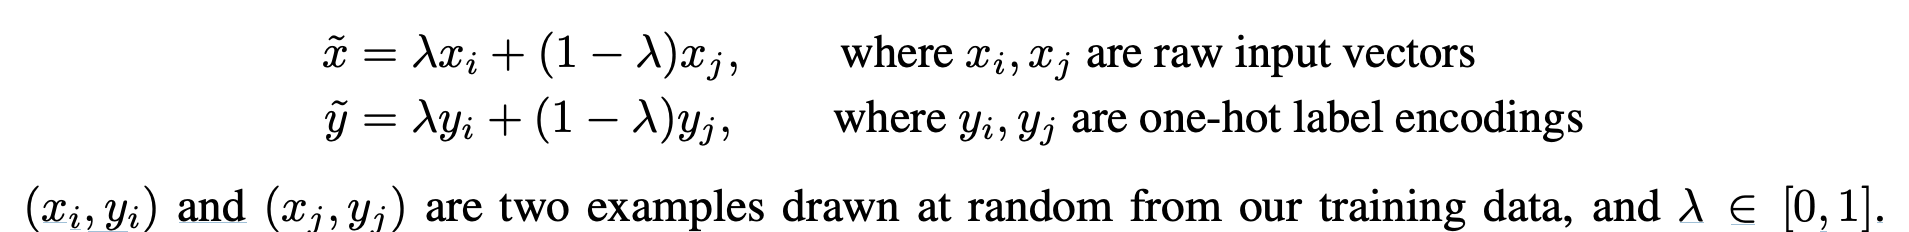

#### Αξιολόγηση του μοντέλου στο CIFAR-C

Για να καταλάβουμε περισσότερο τη χρησιμότητα του mixup και γενικότερα της επαύξησησς της κατανομής των δεδομένων εκπαίδευσης θα εκπαιδεύσουμε πάλι το μοντέλο μας στο CIFAR αλλά θα το κάνουμε evaluate στο CIFAR-C.

ΤοCIFAR-C παριέχει διάφορα corruptions (adversarial examples) στις εικόνες του αρχικού dataset, κάτι που το καθιστά πιο κοντά σε μια ρεαλιστική αξιολόγηση του μοντέλου.

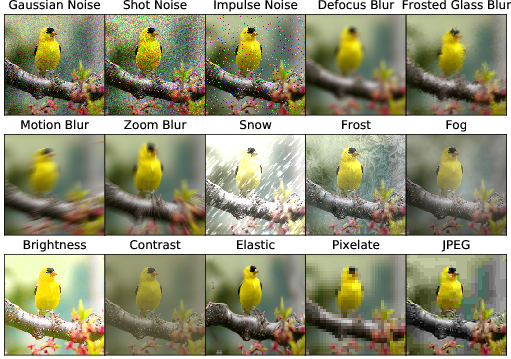


In [ ]:
#### GRADED CELL ####

# Complete the following code and run the cell


class CIFAR_Dataset(Dataset):
    def __init__(self, data_dir, train, transform, mixup):
        self.data_dir = data_dir
        self.train = train
        self.transform = transform
        self.data = []
        self.targets = []
        self.mixup = mixup

        # Loading all the data depending on whether the dataset is training or testing
        if self.train:
            for i in range(5):
                with open(data_dir + 'data_batch_' + str(i+1), 'rb') as f:
                    entry = pickle.load(f, encoding='latin1')
                    self.data.append(entry['data'])
                    self.targets.extend(entry['labels'])
        else:
            with open(data_dir + 'test_batch', 'rb') as f:
                entry = pickle.load(f, encoding='latin1')
                self.data.append(entry['data'])
                self.targets.extend(entry['labels'])

        # Reshape it and turn it into the HWC format which PyTorch takes in the images
        # Original CIFAR format can be seen via its official page
        self.data = np.vstack(self.data).reshape(-1, 3, 32, 32)
        self.data = self.data.transpose((0, 2, 3, 1))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Create a one-hot label
        label = torch.zeros(10)
        label[self.targets[idx]] = 1.

        # Transform the image by converting to tensor and normalizing it
        image = self.transform(self.data[idx]) if self.transform else self.data[idx]

        # If data is for training and mixup is enabled, perform mixup roughly on 1 in every 5 images
        if self.train and self.mixup and idx % 5 == 0:
            # Choose another image/label randomly
            mixup_idx = random.randint(0, len(self.data) - 1)
            mixup_label = torch.zeros(10)
            mixup_label[self.targets[mixup_idx]] = 1.
            mixup_image = self.transform(self.data[mixup_idx]) if self.transform else self.data[mixup_idx]

            # Select a random weight from Beta distribution (alpha, alpha) where alpha is a hyperparameter, e.g., 0.2
            alpha = 0.2
            weight = np.random.beta(alpha, alpha)

            # Mixup the images and labels
            # add it
            image = weight * image + (1 - weight) * mixup_image
            label = weight * label + (1 - weight) * mixup_label

        return image, label




In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

CORRUPTIONS = [
    'gaussian_noise', 'shot_noise', 'impulse_noise', 'defocus_blur',
    'glass_blur', 'motion_blur', 'zoom_blur', 'snow', 'frost', 'fog',
    'brightness', 'contrast', 'elastic_transform', 'pixelate',
    'jpeg_compression'
]

In [ ]:
# Evaluation scripts


def val_cifar(test_loader, net):
    """Evaluate network on given dataset."""
    net.eval()
    total_loss = 0.
    total_correct = 0
    with torch.no_grad():
        for images, targets in test_loader:
            images = images.to(device)
            targets = targets.to(device)

            #targets = targets.cuda(non_blocking=True).long()
            #images = images.cuda(non_blocking=True).float()
            logits = net(images)
            pred = logits.data.max(1)[1]
            #total_correct += pred.eq(targets.data).sum().item()
            total_correct += int((pred == torch.argmax(targets, dim=1)).float().sum())
    #print("len(test_loader.dataset)", len(test_loader.dataset))
    return total_correct / len(test_loader.dataset)


def test_cifar(test_loader, net):
    """Evaluate network on given dataset."""
    net.eval()
    params = list(net.parameters())
    total_loss = 0.
    total_correct = 0
    with torch.no_grad():
        for images, targets in test_loader:
            images = images.to(device)
            targets = targets.to(device)
            logits = net(images)

            loss = F.cross_entropy(logits, targets)
            pred = logits.data.max(1)[1]
            total_loss += float(loss.data)
            total_correct += pred.eq(targets.data).sum().item()
    #print("len(test_loader.dataset)", len(test_loader.dataset))
    return total_loss / len(test_loader.dataset), total_correct / len(test_loader.dataset)


def test_c_cifar(net):
    """Evaluate network on given corrupted dataset."""
    base_path = '/content/drive/My Drive/Lab_DL_ex1/data/cifar/CIFAR-10-C/'
    normalize = transforms.Normalize([0.5] * 3, [0.5] * 3)
    test_transform = transforms.Compose(
        [transforms.ToTensor(), normalize])
    test_data = datasets.CIFAR10(
        '/content/drive/My Drive/Lab_DL_ex1/data/cifar/', train=False, transform=test_transform)
    corruption_accs = []
    Weather_accs = []
    Blur_accs = []
    Noise_accs = []
    Digital_accs = []
    weather_corr = ['snow', 'frost', 'fog']
    blur_corr = ['defocus_blur', 'glass_blur', 'motion_blur', 'zoom_blur']
    noise_corr = ['gaussian_noise', 'shot_noise', 'impulse_noise']
    digital_corr = ['brightness', 'contrast', 'elastic_transform', 'pixelate', 'jpeg_compression']

    for corruption in CORRUPTIONS:
        # Reference to original data is mutated
        test_data.data = np.load(base_path + corruption + '.npy')[-10000:]  # take the level 5 severity only
        #pdb.set_trace()
        test_data.targets = torch.LongTensor(np.load(base_path + 'labels.npy')[-10000:])

        test_loader = torch.utils.data.DataLoader(
            test_data,
            batch_size=batch_size,
            shuffle=False,
            #num_workers=4,
            pin_memory=True)
        test_loss, test_acc = test_cifar(test_loader, net)
        corruption_accs.append(test_acc)
        if corruption in weather_corr:
            Weather_accs.append(test_acc)
        elif corruption in blur_corr:
            Blur_accs.append(test_acc)
        elif corruption in noise_corr:
            Noise_accs.append(test_acc)
        elif corruption in digital_corr:
            Digital_accs.append(test_acc)


        #print('{}\n\tTest Loss {:.3f} | Test Acc {:.3f}'.format(
        #    corruption, test_loss, test_acc))
    print('{}\n\t Test Acc {:.3f}'.format(
        'Weather', np.mean(np.array(Weather_accs))))
    print('{}\n\t Test Acc {:.3f}'.format(
        'Blur', np.mean(np.array(Blur_accs))))
    print('{}\n\t Test Acc {:.3f}'.format(
        'Noise', np.mean(np.array(Noise_accs))))
    print('{}\n\t Test Acc {:.3f}'.format(
        'Digital', np.mean(np.array(Digital_accs))))
    all_accs = []
    all_accs.append(np.mean(np.array(Weather_accs)))
    all_accs.append(np.mean(np.array(Blur_accs)))
    all_accs.append(np.mean(np.array(Noise_accs)))
    all_accs.append(np.mean(np.array(Digital_accs)))

    return np.mean(np.array(all_accs))

In [ ]:
# Utils scripts

def save_checkpoint(state, dataset, exp_name, filename='checkpoint.pth.tar'):
    """Saves checkpoint to disk"""
    directory = "runs/%s/%s/" % (dataset, exp_name)
    if not os.path.exists(directory):
        os.makedirs(directory)
    filename = directory + filename
    torch.save(state, filename)


class AverageMeter(object):
    """Computes and stores the average and current value"""

    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count


def accuracy(output, target, topk=(1,)):
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    batch_size = target.size(0)

    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res


def get_lr(step, total_steps, lr_max, lr_min):
  """Compute learning rate according to cosine annealing schedule."""
  return lr_min + (lr_max - lr_min) * 0.5 * (1 +
                                             np.cos(step / total_steps * np.pi))
def bceloss(x, y):
    eps = 1e-6
    return -torch.mean(y * torch.log(x + eps) + (1 - y) * torch.log(1 - x + eps))


In [ ]:
#### GRADED CELL ####

# Κάντε train το καλύτερο μοντέλο που βρήκατε (και αποθηκεύσατε) στα βήματα 1 και 2 χωρίς το mixup
# Hint

#xrisi tou
#28-10 with dropout αφου ήταν το καλύτερο μοντέλο

num_epochs = 10

num_iters = 391 * num_epochs  # number of total epochs to run

batch_size = 128

print_freq = 391 # evaluation frequency (and log) (every epoch)

layers =  28 # total number of layers of wrn (wide residual network)
num_classes = 10   # Number of classes of th CIFAR dataset
widen_factor = 10
droprate = 0.3 #  Dropout probability for regularization
lr = 0.1  # learning rate
weight_decay = 0.0005

model = WideResNet(layers, num_classes, widen_factor, droprate)

model = model.to(device)

optimizer = torch.optim.SGD(model.parameters(), lr, momentum=0.9, nesterov=True,
                                    weight_decay=weight_decay)
# scheduler_theta = torch.optim.lr_scheduler.StepLR(optimizer, step_size=60)
scheduler = torch.optim.lr_scheduler.LambdaLR(
  optimizer,
  lr_lambda=lambda step: get_lr(
      step,
      num_iters,
      1,
      1e-6 / lr))

criterion = nn.CrossEntropyLoss().cuda()

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


train_dataset = CIFAR_Dataset('/content/drive/My Drive/Lab_DL_ex1/data/cifar/cifar-10-batches-py/', 1, transform, False)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = CIFAR_Dataset('/content/drive/My Drive/Lab_DL_ex1/data/cifar/cifar-10-batches-py/', 0, transform, False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Train loop
train_loader_iter = iter(train_loader)

counter_k = 0

epoch = 0
for t in range(0, num_iters):

    losses = AverageMeter()
    top1 = AverageMeter()
    model.train()

    try:
        input, target = next(train_loader_iter)
    except:
        train_loader_iter = iter(train_loader)
        input, target = next(train_loader_iter)
    #input, target = input.cuda(non_blocking=True).float(), target.cuda(non_blocking=True).long()
    imgs = input.to(device)
    labels = target.to(device)
    preds = model(imgs)
    preds = nn.Softmax(dim=1)(preds)
    loss = criterion(preds, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if t % print_freq == 0 and t >= print_freq:
        print("t = ", t)
        prec1 = val_cifar(val_loader, model)
        print("Epoch ", epoch)
        print("Validation set acc", prec1)
        # logfile.write('validation set acc: ' + str(prec1) + '\n')
        print('Average Cifar-C accuracy {}'.format(test_c_cifar(model)))
        epoch += 1


t =  391
Epoch  0
Validation set acc 0.3844
Weather
	 Test Acc 0.219
Blur
	 Test Acc 0.319
Noise
	 Test Acc 0.373
Digital
	 Test Acc 0.302
Average Cifar-C accuracy 0.30333
t =  782
Epoch  1
Validation set acc 0.4164
Weather
	 Test Acc 0.252
Blur
	 Test Acc 0.290
Noise
	 Test Acc 0.308
Digital
	 Test Acc 0.318
Average Cifar-C accuracy 0.29178125
t =  1173
Epoch  2
Validation set acc 0.5446
Weather
	 Test Acc 0.329
Blur
	 Test Acc 0.325
Noise
	 Test Acc 0.126
Digital
	 Test Acc 0.393
Average Cifar-C accuracy 0.29313125
t =  1564
Epoch  3
Validation set acc 0.6341
Weather
	 Test Acc 0.420
Blur
	 Test Acc 0.329
Noise
	 Test Acc 0.357
Digital
	 Test Acc 0.441
Average Cifar-C accuracy 0.38692791666666665
t =  1955
Epoch  4
Validation set acc 0.5758
Weather
	 Test Acc 0.412
Blur
	 Test Acc 0.365
Noise
	 Test Acc 0.266
Digital
	 Test Acc 0.375
Average Cifar-C accuracy 0.3544816666666667
t =  2346
Epoch  5
Validation set acc 0.7244
Weather
	 Test Acc 0.445
Blur
	 Test Acc 0.343
Noise
	 Test Acc

In [ ]:
#### GRADED CELL ####
# Train your best model with mixup and test on CIFAR-C

# Model parameters
#28-10 with dropout


num_epochs = 10

num_iters = 391 * num_epochs  # number of total epochs to run

batch_size = 128

print_freq = 391 # evaluation frequency (and log) (every epoch)

layers =  28# total number of layers of wrn (wide residual network)
num_classes = 10   # Number of classes of th CIFAR dataset
widen_factor = 10
droprate = 0.3#  Dropout probability for regularization
lr = 0.1  # learning rate
weight_decay = 0.0005

model = WideResNet(layers, num_classes, widen_factor, droprate)

model = model.to(device)

optimizer = torch.optim.SGD(model.parameters(), lr, momentum=0.9, nesterov=True,
                                    weight_decay=weight_decay)
# scheduler_theta = torch.optim.lr_scheduler.StepLR(optimizer, step_size=60)
scheduler = torch.optim.lr_scheduler.LambdaLR(
  optimizer,
  lr_lambda=lambda step: get_lr(
      step,
      num_iters,
      1,
      1e-6 / lr))

criterion = nn.CrossEntropyLoss().cuda()

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


train_dataset = CIFAR_Dataset('/content/drive/My Drive/Lab_DL_ex1/data/cifar/cifar-10-batches-py/', 1, transform, True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = CIFAR_Dataset('/content/drive/My Drive/Lab_DL_ex1/data/cifar/cifar-10-batches-py/', 0, transform, True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Train loop
train_loader_iter = iter(train_loader)

counter_k = 0

epoch = 0
for t in range(0, num_iters):

    losses = AverageMeter()
    top1 = AverageMeter()
    model.train()

    try:
        input, target = next(train_loader_iter)
    except:
        train_loader_iter = iter(train_loader)
        input, target = next(train_loader_iter)
    #input, target = input.cuda(non_blocking=True).float(), target.cuda(non_blocking=True).long()
    imgs = input.to(device)
    labels = target.to(device)
    preds = model(imgs)
    preds = nn.Softmax(dim=1)(preds)
    loss = criterion(preds, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if t % print_freq == 0 and t >= print_freq:
        print("t = ", t)
        prec1 = val_cifar(val_loader, model)
        print("Epoch ", epoch)
        print("Validation set acc", prec1)
        # logfile.write('validation set acc: ' + str(prec1) + '\n')
        print('Average Cifar-C accuracy {}'.format(test_c_cifar(model)))
        epoch += 1

t =  391
Epoch  0
Validation set acc 0.3507
Weather
	 Test Acc 0.259
Blur
	 Test Acc 0.294
Noise
	 Test Acc 0.325
Digital
	 Test Acc 0.295
Average Cifar-C accuracy 0.29339291666666667
t =  782
Epoch  1
Validation set acc 0.464
Weather
	 Test Acc 0.354
Blur
	 Test Acc 0.378
Noise
	 Test Acc 0.342
Digital
	 Test Acc 0.383
Average Cifar-C accuracy 0.36417875
t =  1173
Epoch  2
Validation set acc 0.5372
Weather
	 Test Acc 0.369
Blur
	 Test Acc 0.377
Noise
	 Test Acc 0.409
Digital
	 Test Acc 0.411
Average Cifar-C accuracy 0.391305
t =  1564
Epoch  3
Validation set acc 0.6153
Weather
	 Test Acc 0.452
Blur
	 Test Acc 0.334
Noise
	 Test Acc 0.412
Digital
	 Test Acc 0.447
Average Cifar-C accuracy 0.41091458333333336
t =  1955
Epoch  4
Validation set acc 0.5969
Weather
	 Test Acc 0.428
Blur
	 Test Acc 0.349
Noise
	 Test Acc 0.311
Digital
	 Test Acc 0.414
Average Cifar-C accuracy 0.37561333333333335
t =  2346
Epoch  5
Validation set acc 0.6138
Weather
	 Test Acc 0.297
Blur
	 Test Acc 0.317
Noise


In [ ]:
#### GRADED CELL #### (Bonus)

# Plot the confidence scores for CIFAR-C with WRN model
# trained with and without mixup and comment
